In [1]:
from sklearn import datasets
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd

In [3]:
wine_data = datasets.load_wine()
print(wine_data.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [5]:
data_input = wine_data.data
data_output = wine_data.target

In [6]:
data_output

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,log_loss,classification_report

kf = KFold(4, shuffle=True)
kf.get_n_splits(data_input)
lr = LogisticRegression()

for train_index,test_index in kf.split(data_input,data_output):
    lr.fit(data_input[train_index],data_output[train_index])
    y_pre_lr = lr.predict(data_input[test_index])
    y = data_output[test_index]
    print(f1_score(y,y_pre_lr,average=None))

[0.96551724 0.97297297 1.        ]
[1.         0.97297297 0.96296296]
[0.875      0.82758621 0.96296296]
[1.         0.94736842 0.9       ]


In [9]:
len(train_index)

134

In [10]:
len(test_index)

44

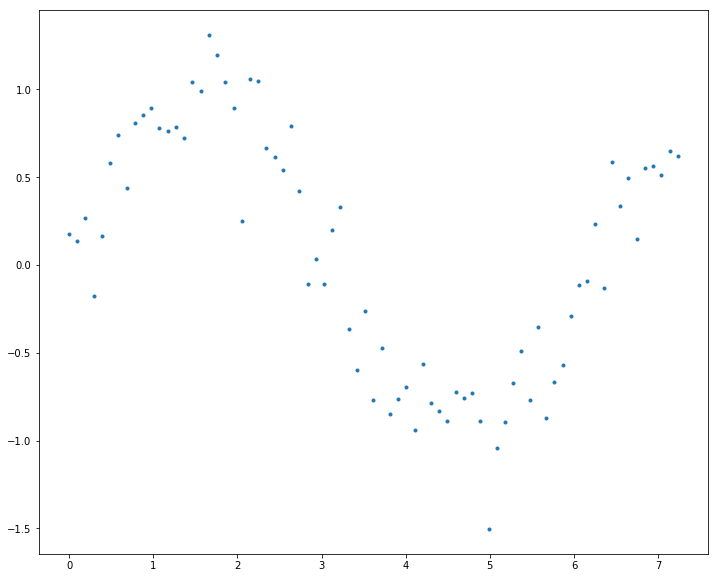

In [2]:
import numpy as np 
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10
x = np.array([1.4*i*np.pi/180 for i in range(0,300,4)])
np.random.seed(20)
y = np.sin(x) + np.random.normal(0,0.2,len(x))
data = pd.DataFrame(np.column_stack([x,y]), columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

In [5]:
data.head()

,x,y
0,0.000000,0.176779
1,0.097738,0.136756
2,0.195477,0.265742
3,0.293215,-0.179621
4,0.390954,0.164104


In [6]:
for i in range(2,16):
    colname = 'x_%d'%i
    data[colname] = data['x']**i
print(data.head())

          x         y       x_2       x_3       x_4       x_5           x_6  \
0  0.000000  0.176779  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
1  0.097738  0.136756  0.009553  0.000934  0.000091  0.000009  8.717508e-07   
2  0.195477  0.265742  0.038211  0.007469  0.001460  0.000285  5.579205e-05   
3  0.293215 -0.179621  0.085975  0.025209  0.007392  0.002167  6.355064e-04   
4  0.390954  0.164104  0.152845  0.059755  0.023362  0.009133  3.570691e-03   

            x_7           x_8           x_9          x_10          x_11  \
0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1  8.520356e-08  8.327663e-09  8.139328e-10  7.955252e-11  7.775339e-12   
2  1.090606e-05  2.131882e-06  4.167336e-07  8.146178e-08  1.592389e-08   
3  1.863402e-04  5.463780e-05  1.602064e-05  4.697497e-06  1.377378e-06   
4  1.395975e-03  5.457617e-04  2.133676e-04  8.341686e-05  3.261214e-05   

           x_12          x_13          x_14          x_15  
0  0.000000e+0

In [14]:
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    predictors = ['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])

    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors], data['y'])
    y_pred = linreg.predict(data[predictors])
    
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'],data['y'], '.')
        plt.title('Plot for power:%d' %power)
        
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

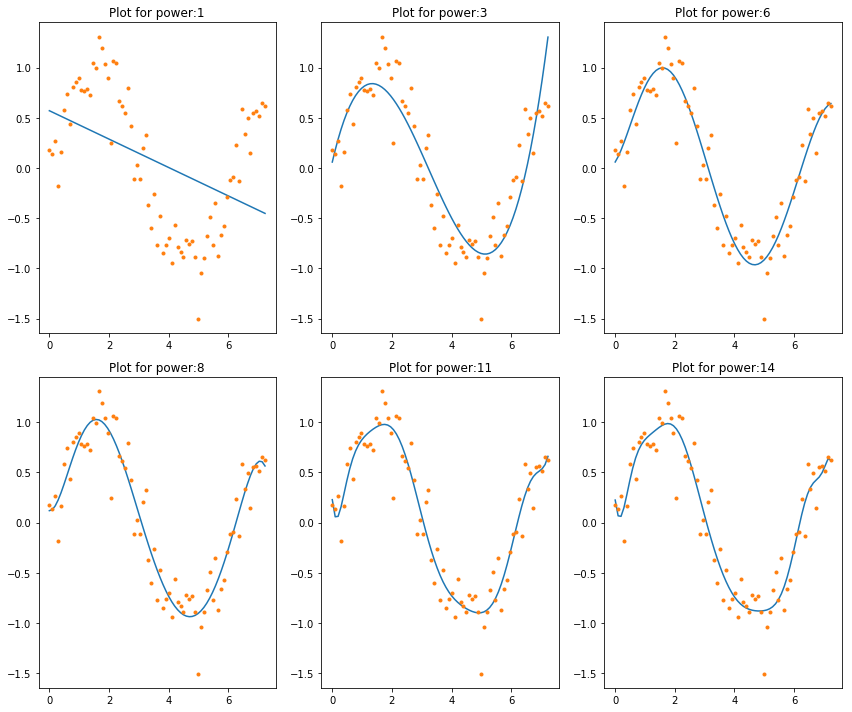

In [16]:
col = ['rss', 'intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)
models_to_plot = {1:231,3:232,6:233,8:234,11:235,14:236}
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [27]:
from sklearn.linear_model import Ridge
models_to_plot = {1:231,3:232,6:233,8:234,11:235,14:236}
def ridge_regression(data, predictors, alpha, models_to_plot = {}):
    ridgereg = Ridge(alpha=alpha, normalize=True)
    ridgereg.fit(data[predictors], data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'],data['y'], '.')
        plt.title('Plot for alpha:%.3g' %alpha)
        
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret


d:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.587636e-17
  overwrite_a=True).T


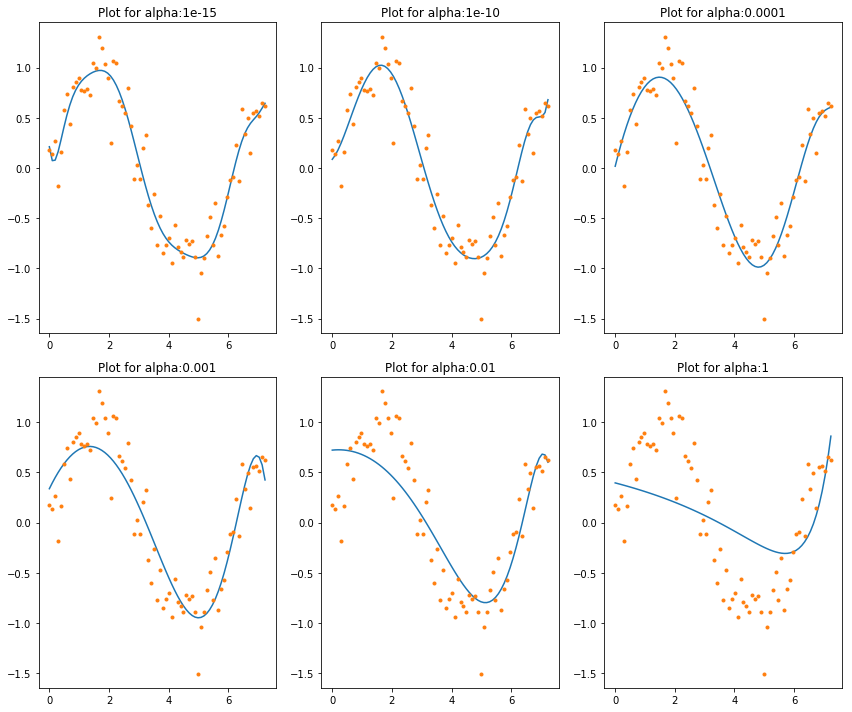

In [37]:
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])
#alpha_ridge = [le-15, le-10, le-8, le-4, le-3, le-2, 1,5 , 10, 20]
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 , 10, 20]

col=['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

#models_to_plot = {0.00000000001:231, 0.0000001:232, 0.00001；233, 0.001:234, 0.01:235, 5:236}
models_to_plot = {1e-15:231,1e-10:232,1e-4:233,1e-3:234,1e-2:235,1:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [30]:
from sklearn.linear_model import Lasso
#models_to_plot = {1:231,3:232,6:233,8:234,11:235,14:236}
def lasso_regression(data, predictors, alpha, models_to_plot = {}):
    lassoreg = Lasso(alpha=alpha, normalize=True)
    lassoreg.fit(data[predictors], data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'],data['y'], '.')
        plt.title('Plot for alpha:%.3g' %alpha)
        
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret


d:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


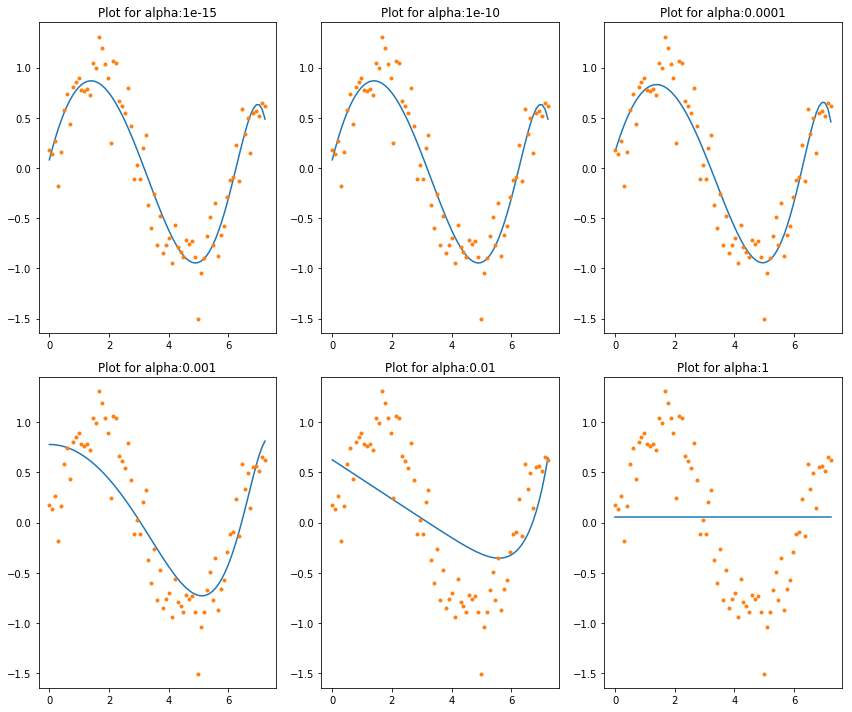

In [36]:
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])
#alpha_ridge = [le-15, le-10, le-8, le-4, le-3, le-2, 1,5 , 10, 20]
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 , 10,20]

col=['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#models_to_plot = {0.00000000001:231, 0.0000001:232, 0.00001；233, 0.001:234, 0.01:235, 5:236}
models_to_plot = {1e-15:231,1e-10:232,1e-4:233,1e-3:234,1e-2:235,1:236}
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [41]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [45]:
iris = load_iris()

In [43]:
pipeline = Pipeline([
    ('scaler',preprocessing.StandardScaler()),
    ('clf', LogisticRegression())
])

In [46]:
scores = cross_validation.cross_val_score(pipeline, iris.data, iris.target, cv=3)

In [47]:
scores

array([0.88235294, 0.92156863, 0.89583333])